# 北京房价影响因素分析

**导入包**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from numpy import corrcoef,array
#from IPython.display import HTML, display
from statsmodels.formula.api import ols

**引入数据源**

In [2]:
#读入清洗过后的数据
dat=pd.read_csv("sndHsPr.csv")  
dat.shape

(16210, 8)

**查看数据情况**

In [3]:
#价格单位转换成万元
dat.price=dat.price/10000  
#查看数据情况
dat.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dist,16210,6,fengtai,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomnum,16210,NaN,NaN,NaN,2.16619,0.809907,1,2,2,3,5
halls,16210,NaN,NaN,NaN,1.22141,0.532048,0,1,1,2,3
AREA,16210,NaN,NaN,NaN,91.7466,44.0008,30.06,60,78.83,110.517,299
floor,16210,3,middle,5580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subway,16210,NaN,NaN,NaN,0.827822,0.377546,0,1,1,1,1
school,16210,NaN,NaN,NaN,0.303085,0.459606,0,0,0,1,1
price,16210,NaN,NaN,NaN,6.11518,2.22934,1.8348,4.28123,5.7473,7.60998,14.9871


## 因变量分析

**price**

In [ ]:
matplotlib.rcParams['axes.unicode_minus']=False#解决保存图像时负号'-'显示为方块的问题
plt.rcParams['font.sans-serif'] = ['SimHei']#指定默认字体 

#因变量直方图
dat.price.hist(bins=20)
#dat.price.plot(kind="hist",color='lightblue')
plt.xlabel("price-area(w/m^2)")
plt.ylabel("freq")


In [ ]:
#查看price的均值、中位数和标准差等更多信息
print(dat.price.agg(['mean','median','std']))  
print(dat.price.quantile([0.25,0.5,0.75]))

## 自变量

In [ ]:
#整体来看
for i in range(7):
    if i != 3:
        print(dat.columns.values[i],":")
        print(dat[dat.columns.values[i]].agg(['value_counts']).T)
        print("=======================================================================")
    else:
        continue
print('AREA:')
print(dat.AREA.agg(['min','mean','median','max','std']).T)

In [ ]:
#频次统计
dat.dist.value_counts().plot(kind = 'pie')   #绘制柱柱形图
dat.dist.agg(['value_counts'])

In [ ]:
#不同城区的单位房价面积均值情况
dat.price.groupby(dat.dist).mean().sort_values(ascending= True).plot(kind = 'barh')  

/Users/gengbh/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 0, 'city')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


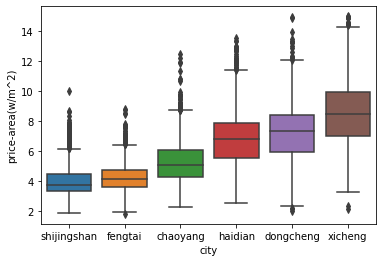

In [4]:
matplotlib.rcParams['axes.unicode_minus']=False#解决保存图像时负号'-'显示为方块的问题
plt.rcParams['font.sans-serif'] = ['SimHei']#指定默认字体 

dat1=dat[['dist','price']]
dat1.dist=dat1.dist.astype("category")
dat1.dist.cat.set_categories(["shijingshan","fengtai","chaoyang","haidian","dongcheng","xicheng"],inplace=True)
#dat1.sort_values(by=['dist'],inplace=True)
sns.boxplot(x='dist',y='price',data=dat1)
#dat1.boxplot(by='dist',patch_artist=True)
plt.ylabel("price-area(w/m^2)")
plt.xlabel("city")
# plt.title("城区对房价的分组箱线图")

In [ ]:
print(matplotlib.matplotlib_fname())

In [ ]:
print(matplotlib.matplotlib_fname())